In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('termdeposit_test.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


in this datasets predict whether the customer has taken the subscription yes or not

In [3]:
df.head(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [4]:
df.tail(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13544,41787,62,retired,married,secondary,no,1495,no,no,cellular,13,oct,896,1,57,2,success
13545,39915,24,student,single,secondary,no,228,no,no,cellular,2,jun,154,1,-1,0,unknown
13546,39530,48,management,single,tertiary,no,5689,no,no,cellular,26,may,527,2,103,1,success
13547,28719,31,technician,single,tertiary,no,236,yes,no,cellular,30,jan,200,1,259,1,failure
13548,27623,37,blue-collar,married,primary,no,1322,yes,no,cellular,21,nov,14,8,185,1,other
13549,8494,32,services,married,secondary,no,1464,yes,no,unknown,3,jun,193,1,-1,0,unknown
13550,1901,35,management,single,tertiary,no,-202,yes,no,unknown,9,may,1461,2,-1,0,unknown
13551,35493,56,technician,married,secondary,no,264,yes,yes,cellular,7,may,639,2,280,5,success
13552,15162,45,technician,married,secondary,no,1081,yes,no,cellular,17,jul,127,3,-1,0,unknown
13553,20780,50,self-employed,married,secondary,no,36,no,no,cellular,13,aug,104,10,-1,0,unknown


In [9]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

# Exploratory data analysis

In [6]:
df.shape

(13564, 17)

In [7]:
print("The Dimension of Datasets:", df.shape)
print("The columns of the datasets:",df.columns)

The Dimension of Datasets: (13564, 17)
The columns of the datasets: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [8]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [9]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

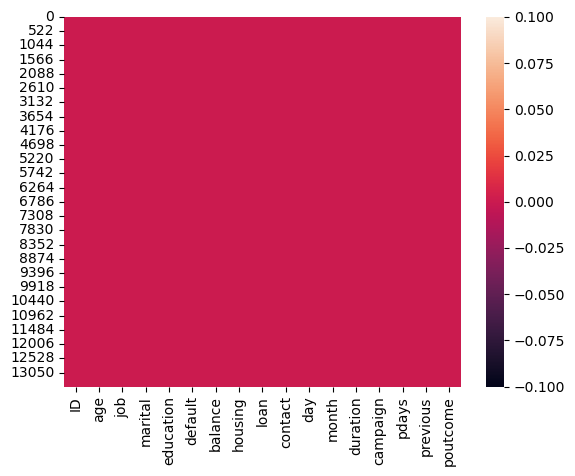

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [5]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)    

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical_col :",numerical_col)


Categorical_col : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_col : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [16]:
df["job"].unique()

array(['services', 'retired', 'self-employed', 'blue-collar',
       'management', 'technician', 'admin.', 'unemployed', 'housemaid',
       'entrepreneur', 'student', 'unknown'], dtype=object)

In [19]:
df["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [20]:
df["education"].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [23]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df["housing"].unique()

array(['yes', 'no'], dtype=object)

In [25]:
df["loan"].unique

<bound method Series.unique of 0         no
1         no
2         no
3         no
4        yes
        ... 
13559     no
13560     no
13561     no
13562     no
13563     no
Name: loan, Length: 13564, dtype: object>

In [26]:
df["contact"].unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [27]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

# Data Visualization

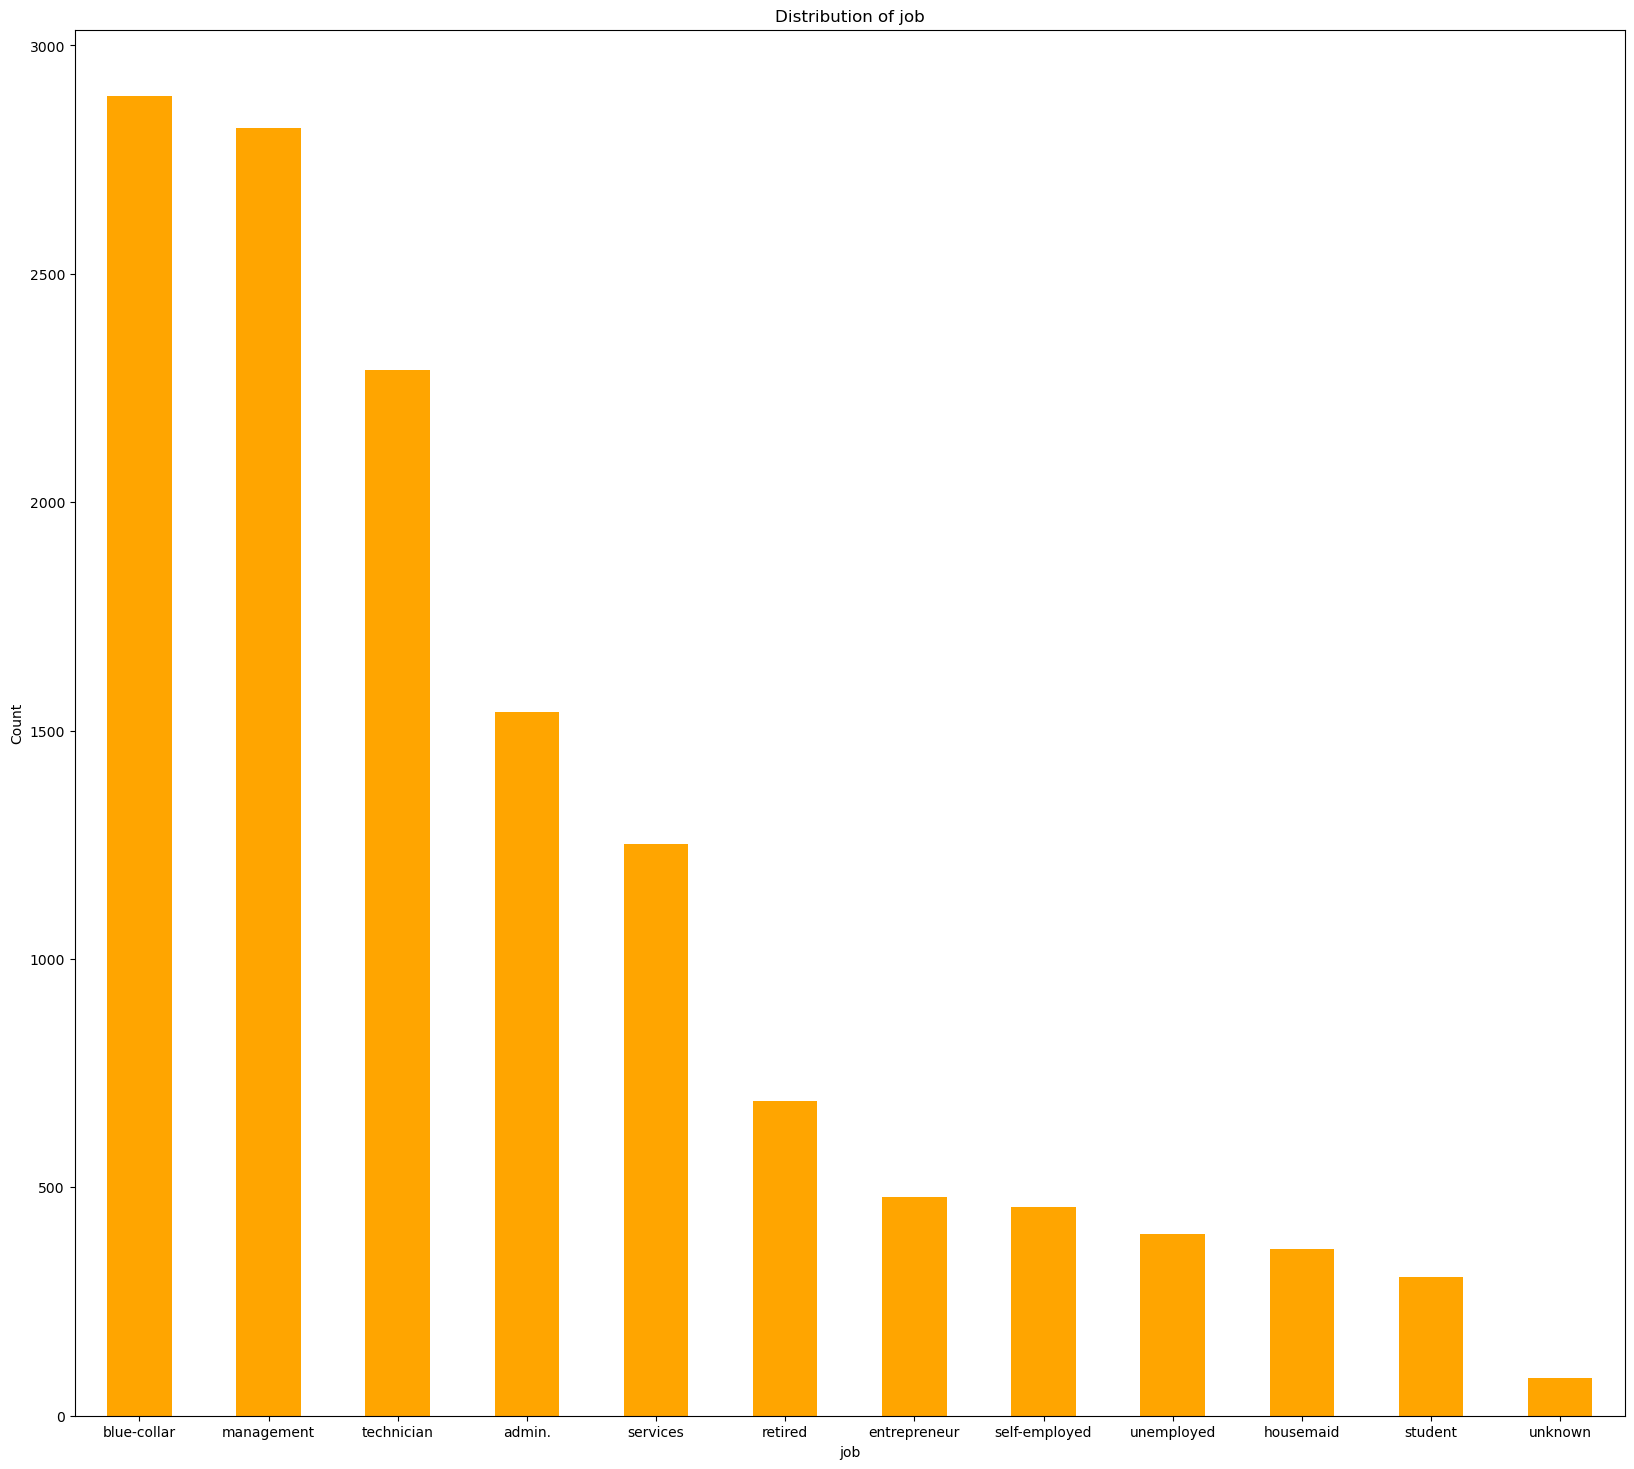

In [35]:
job_counts =df["job"].value_counts()


plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='orange')
plt.title("Distribution of job")
plt.xlabel("job")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

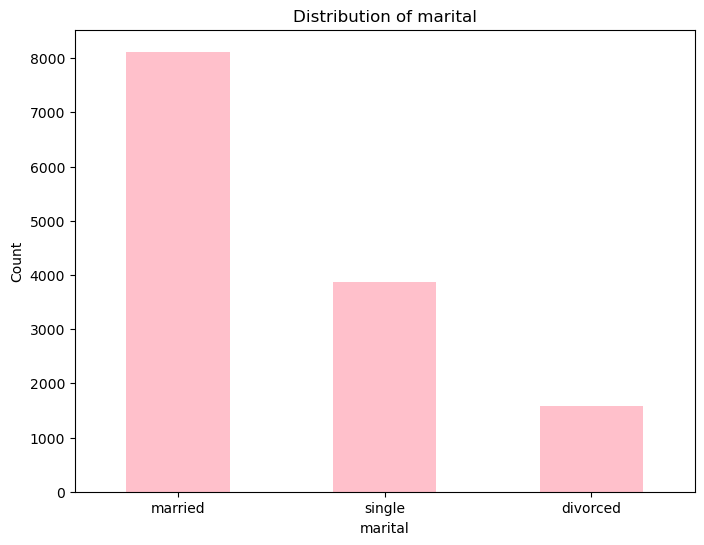

In [36]:
job_counts =df["marital"].value_counts()


plt.figure(figsize=(8,6))
job_counts.plot(kind='bar', color='pink')
plt.title("Distribution of marital")
plt.xlabel("marital")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

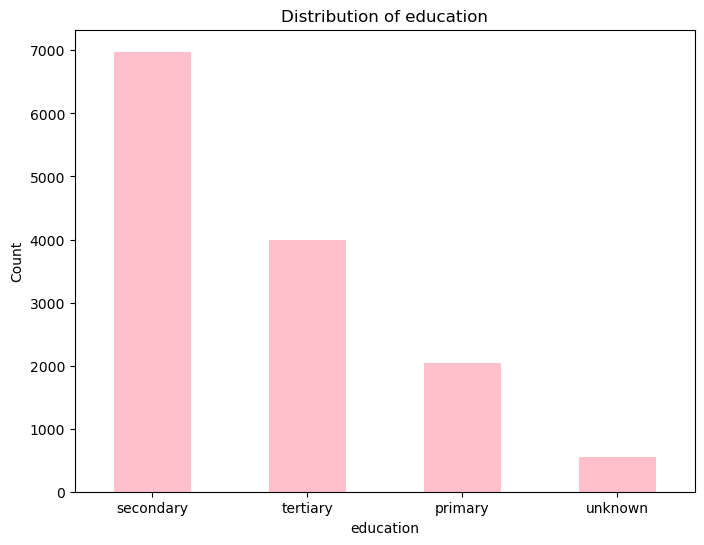

In [37]:
job_counts =df["education"].value_counts()


plt.figure(figsize=(8,6))
job_counts.plot(kind='bar', color='pink')
plt.title("Distribution of education")
plt.xlabel("education")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

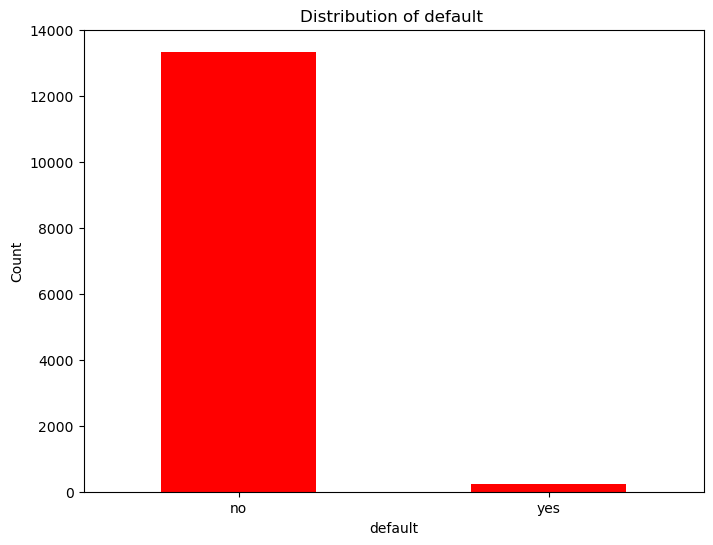

In [5]:
job_counts =df["default"].value_counts()


plt.figure(figsize=(8,6))
job_counts.plot(kind='bar', color='red')
plt.title("Distribution of default ")
plt.xlabel("default")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<bound method IndexOpsMixin.value_counts of 0        yes
1         no
2        yes
3        yes
4         no
        ... 
13559     no
13560    yes
13561    yes
13562     no
13563    yes
Name: housing, Length: 13564, dtype: object>


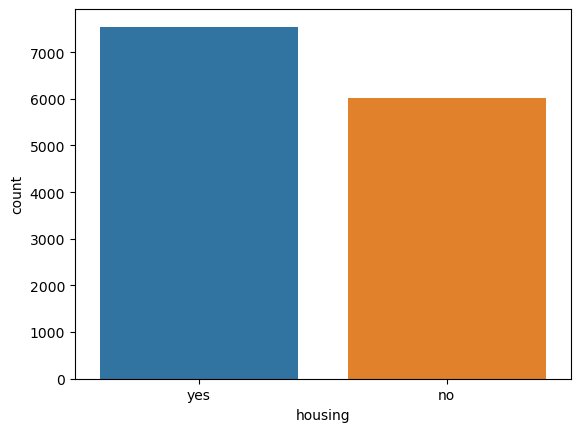

In [6]:
ax=sns.countplot(x="housing",data=df)
print(df["housing"].value_counts)

loan
no     11451
yes     2113
Name: count, dtype: int64


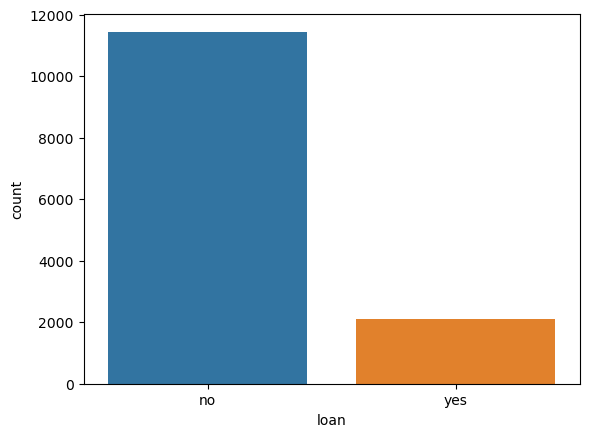

In [13]:
ax=sns.countplot(x="loan", data=df)
print(df["loan"].value_counts())

contact
cellular     8862
unknown      3843
telephone     859
Name: count, dtype: int64


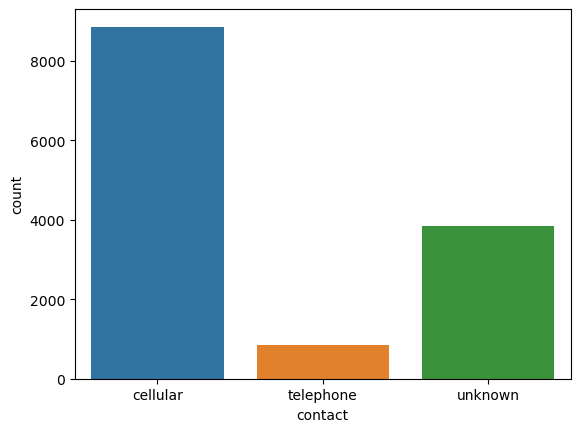

In [8]:
ax=sns.countplot(x="contact", data=df)
print(df["contact"].value_counts())

poutcome
unknown    11030
failure     1539
other        552
success      443
Name: count, dtype: int64


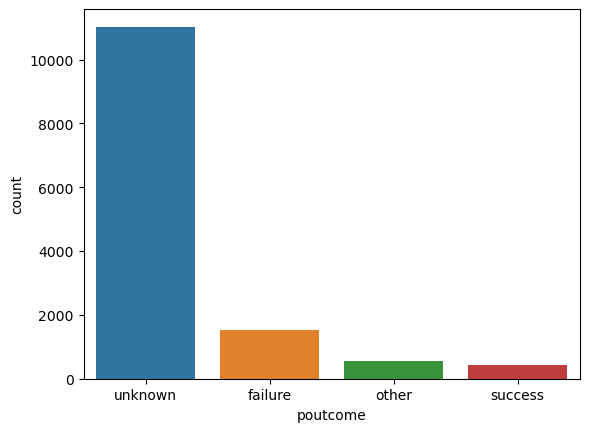

In [9]:
ax=sns.countplot(x="poutcome", data=df)
print(df["poutcome"].value_counts())

campaign
1     5282
2     3707
3     1663
4     1080
5      519
6      375
7      217
8      184
9       91
10      82
11      75
12      53
13      40
16      25
14      25
15      23
17      17
21      16
18      14
19      14
23       9
24       7
20       6
22       5
25       5
29       4
26       4
36       3
31       3
32       3
27       2
28       2
30       2
50       1
33       1
46       1
41       1
58       1
35       1
51       1
Name: count, dtype: int64


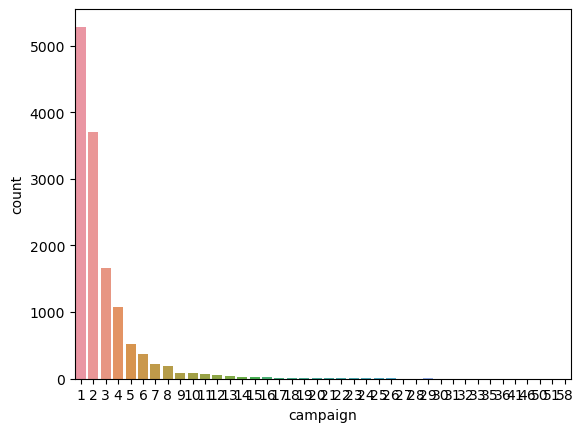

In [10]:
ax=sns.countplot(x="campaign", data=df)
print(df["campaign"].value_counts())

duration
91      63
95      62
73      61
151     60
92      59
        ..
572      1
799      1
1170     1
3253     1
881      1
Name: count, Length: 1201, dtype: int64


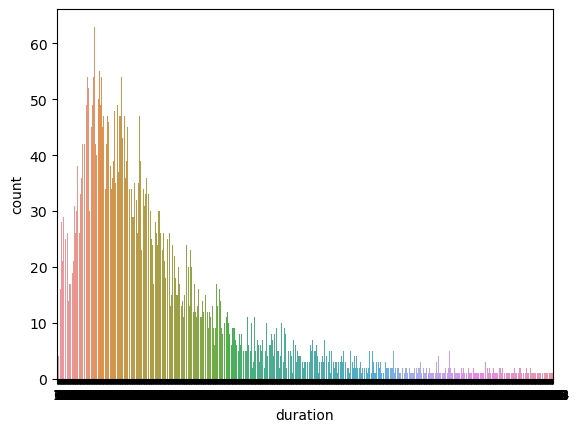

In [14]:
ax=sns.countplot(x="duration", data=df)
print(df["duration"].value_counts())

day
20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561
28    554
5     537
19    529
29    504
15    495
12    487
13    486
30    484
11    465
9     464
16    434
4     429
2     393
3     318
27    317
23    282
26    274
22    265
25    254
31    183
10    164
24    142
1     102
Name: count, dtype: int64


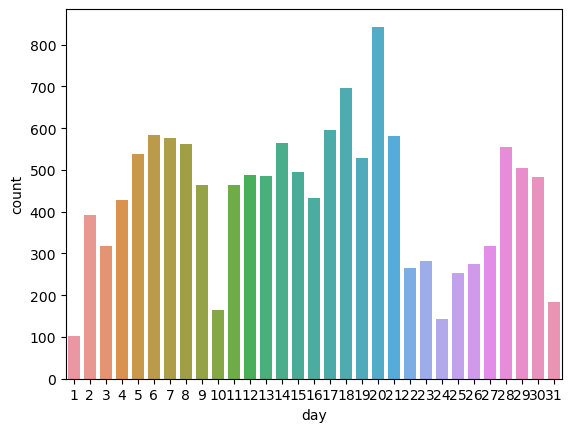

In [3]:
ax=sns.countplot(x="day", data=df)
print(df["day"].value_counts())

pdays
-1      11030
 182       49
 92        47
 181       42
 183       41
        ...  
 378        1
 3          1
 34         1
 215        1
 163        1
Name: count, Length: 422, dtype: int64


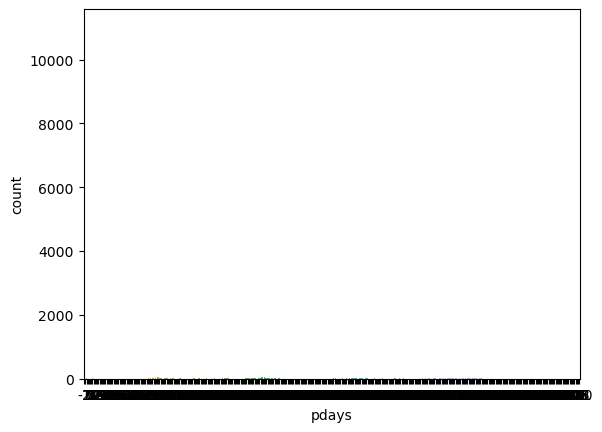

In [4]:
ax=sns.countplot(x="pdays", data=df)
print(df["pdays"].value_counts())

month
may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: count, dtype: int64


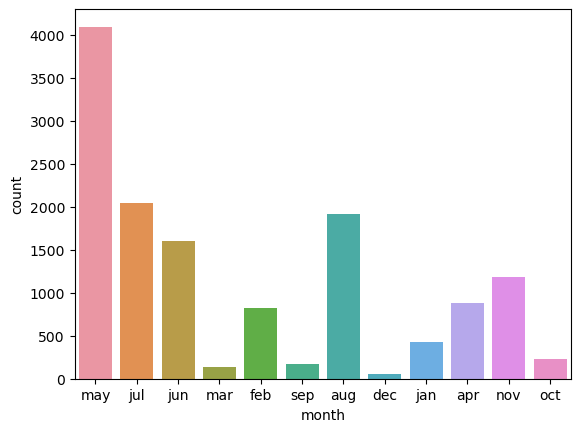

In [5]:
ax=sns.countplot(x="month", data=df)
print(df["month"].value_counts())

contact
cellular     8862
unknown      3843
telephone     859
Name: count, dtype: int64


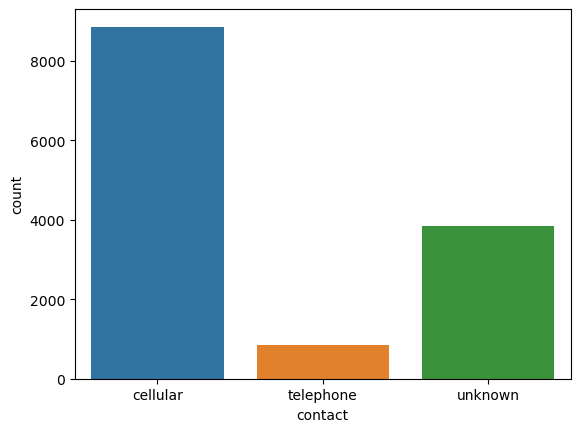

In [6]:
ax=sns.countplot(x="contact", data=df)
print(df["contact"].value_counts())

previous
0     11030
1       851
2       625
3       362
4       213
5       148
6        89
7        67
8        48
9        28
11       19
10       18
12       14
13        8
14        5
16        5
15        5
17        4
24        3
19        3
20        3
30        2
23        2
22        2
29        2
27        1
51        1
40        1
38        1
28        1
18        1
55        1
37        1
Name: count, dtype: int64


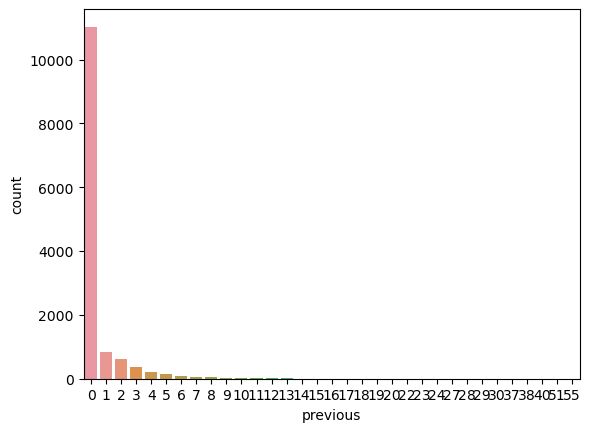

In [7]:
ax=sns.countplot(x="previous", data=df)
print(df["previous"].value_counts())

# Relational Analysis

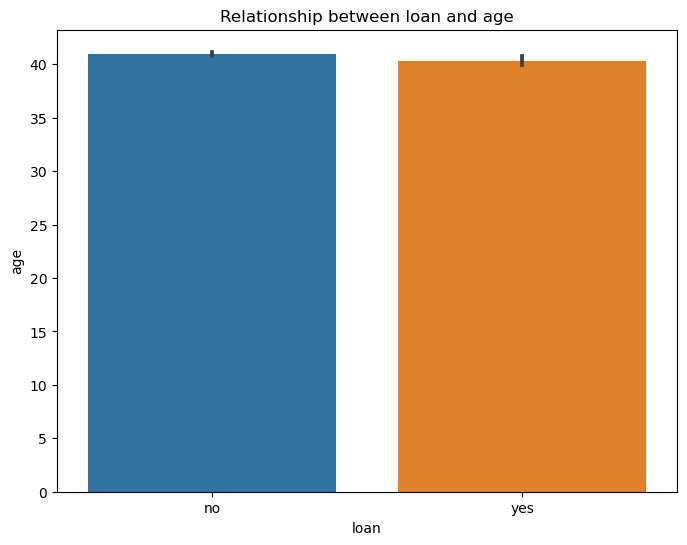

In [5]:
plt.figure(figsize=(8, 6)) 

sns.barplot(x="loan", y="age", data=df)

plt.xlabel("loan")
plt.ylabel("age")
plt.title("Relationship between loan and age")
plt.show()

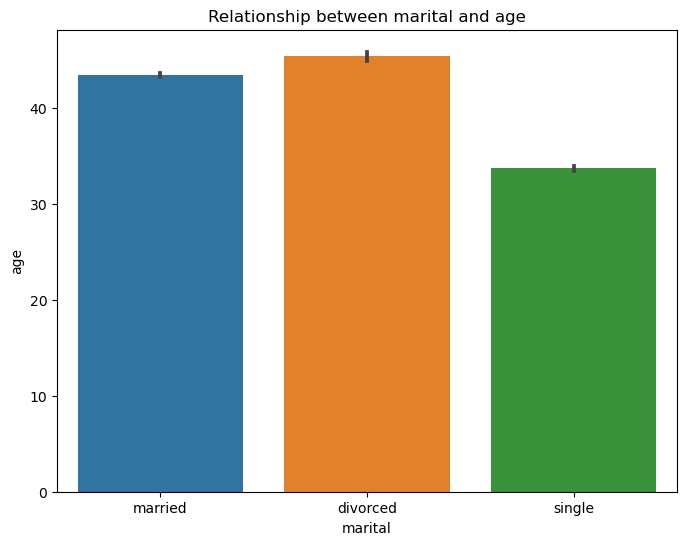

In [6]:
plt.figure(figsize=(8, 6)) 

sns.barplot(x="marital", y="age", data=df)

plt.xlabel("marital")
plt.ylabel("age")
plt.title("Relationship between marital and age")
plt.show()

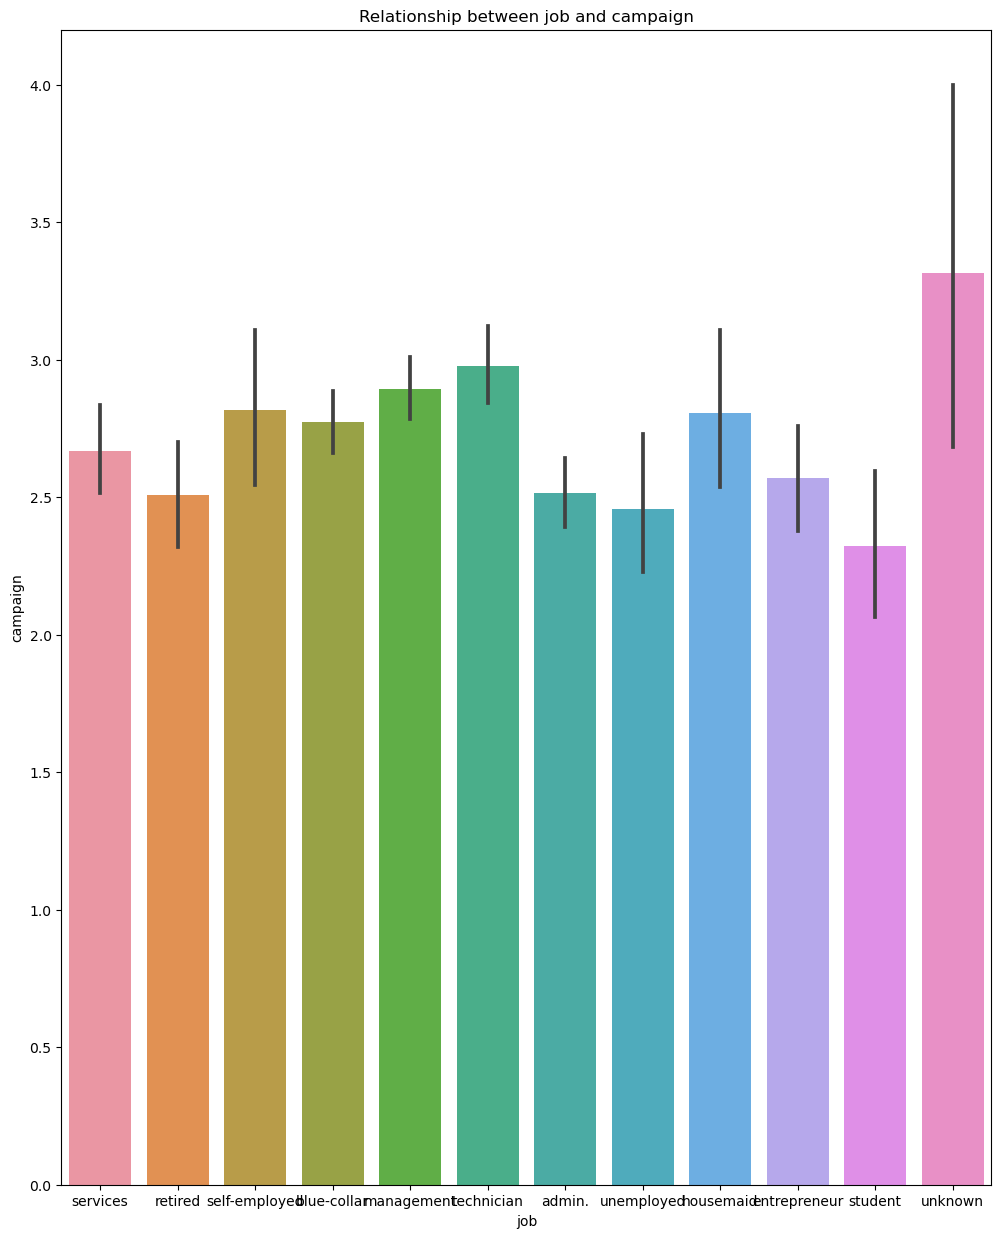

In [7]:
plt.figure(figsize=(12, 15)) 

sns.barplot(x="job", y="campaign", data=df)

plt.xlabel("job")
plt.ylabel("campaign")
plt.title("Relationship between job and campaign")
plt.show()

# Now Checking the outliers

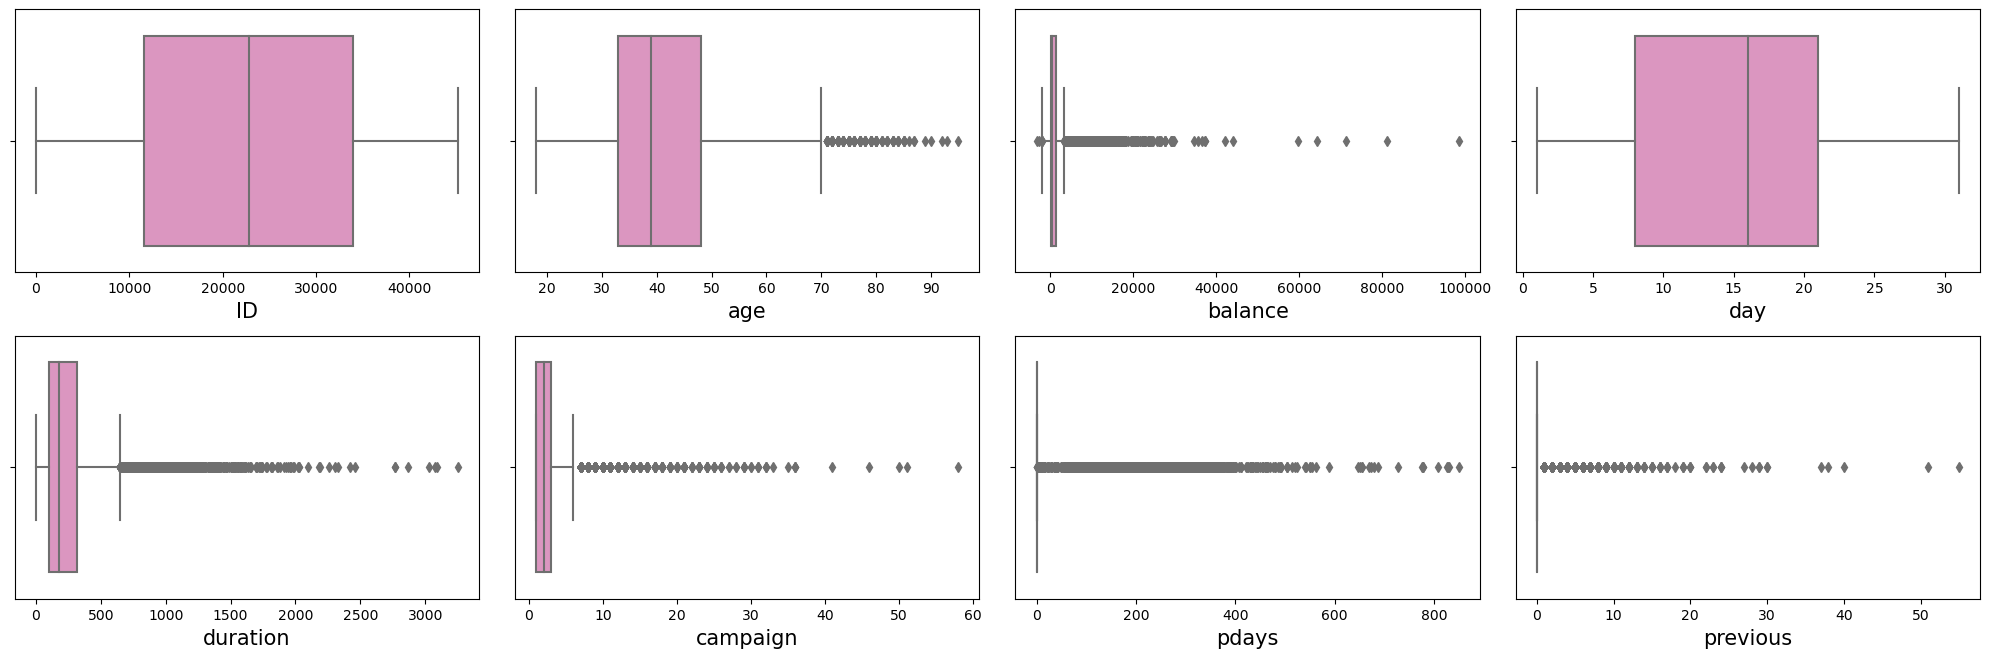

In [13]:
num_numerical_cols = len(numerical_col)
num_rows = 5
num_cols = 4
total_subplots = num_rows * num_cols


plt.figure(figsize=(20, 16), facecolor="white")


plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        
        ax=plt.subplot(num_rows, num_cols, plotnumber)
        
        
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber +=1
        
        
plt.tight_layout()
plt.show()

Almost all of the columns contain outliers so we removed outliers using IQR method

In [50]:
columns_of_interest = ['age','balance','duration', 'campaign']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q1 - Q3


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

print("DataFrame after removing outliers:")
print(df1)

print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
Empty DataFrame
Columns: [ID, age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]
Index: []

Outliers removed:
          ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.   

# Ordinal Encoder

In [51]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

OE=OrdinalEncoder()

mappings={}

for col in df.columns:
    if df[col].dtype == 'object':
        original_values = df[col].unique()
        df[col] = OE.fit_transform(df[[col]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))
        
print("Encoded DataFrame:\n", df) 
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping", mapping)

Encoded DataFrame:
           ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32  7.0      1.0        1.0      0.0      118      1.0   0.0   
1      40403   78  5.0      0.0        0.0      0.0     2787      0.0   0.0   
2       3709   31  6.0      2.0        2.0      0.0      144      1.0   0.0   
3      37422   57  7.0      2.0        0.0      0.0     3777      1.0   0.0   
4      12527   45  1.0      0.0        1.0      0.0     -705      0.0   1.0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39  4.0      1.0        2.0      0.0       45      0.0   0.0   
13560  11743   54  1.0      1.0        0.0      0.0     2281      1.0   0.0   
13561  28292   35  5.0      1.0        0.0      0.0      285      1.0   0.0   
13562  45163   29  0.0      2.0        1.0      0.0      464      0.0   0.0   
13563  34839   29  0.0      1.0        1.0      0.0        2      1.0   0.0   

       contact  day  month  dur

# Checking how the data is distrubuted in each columns

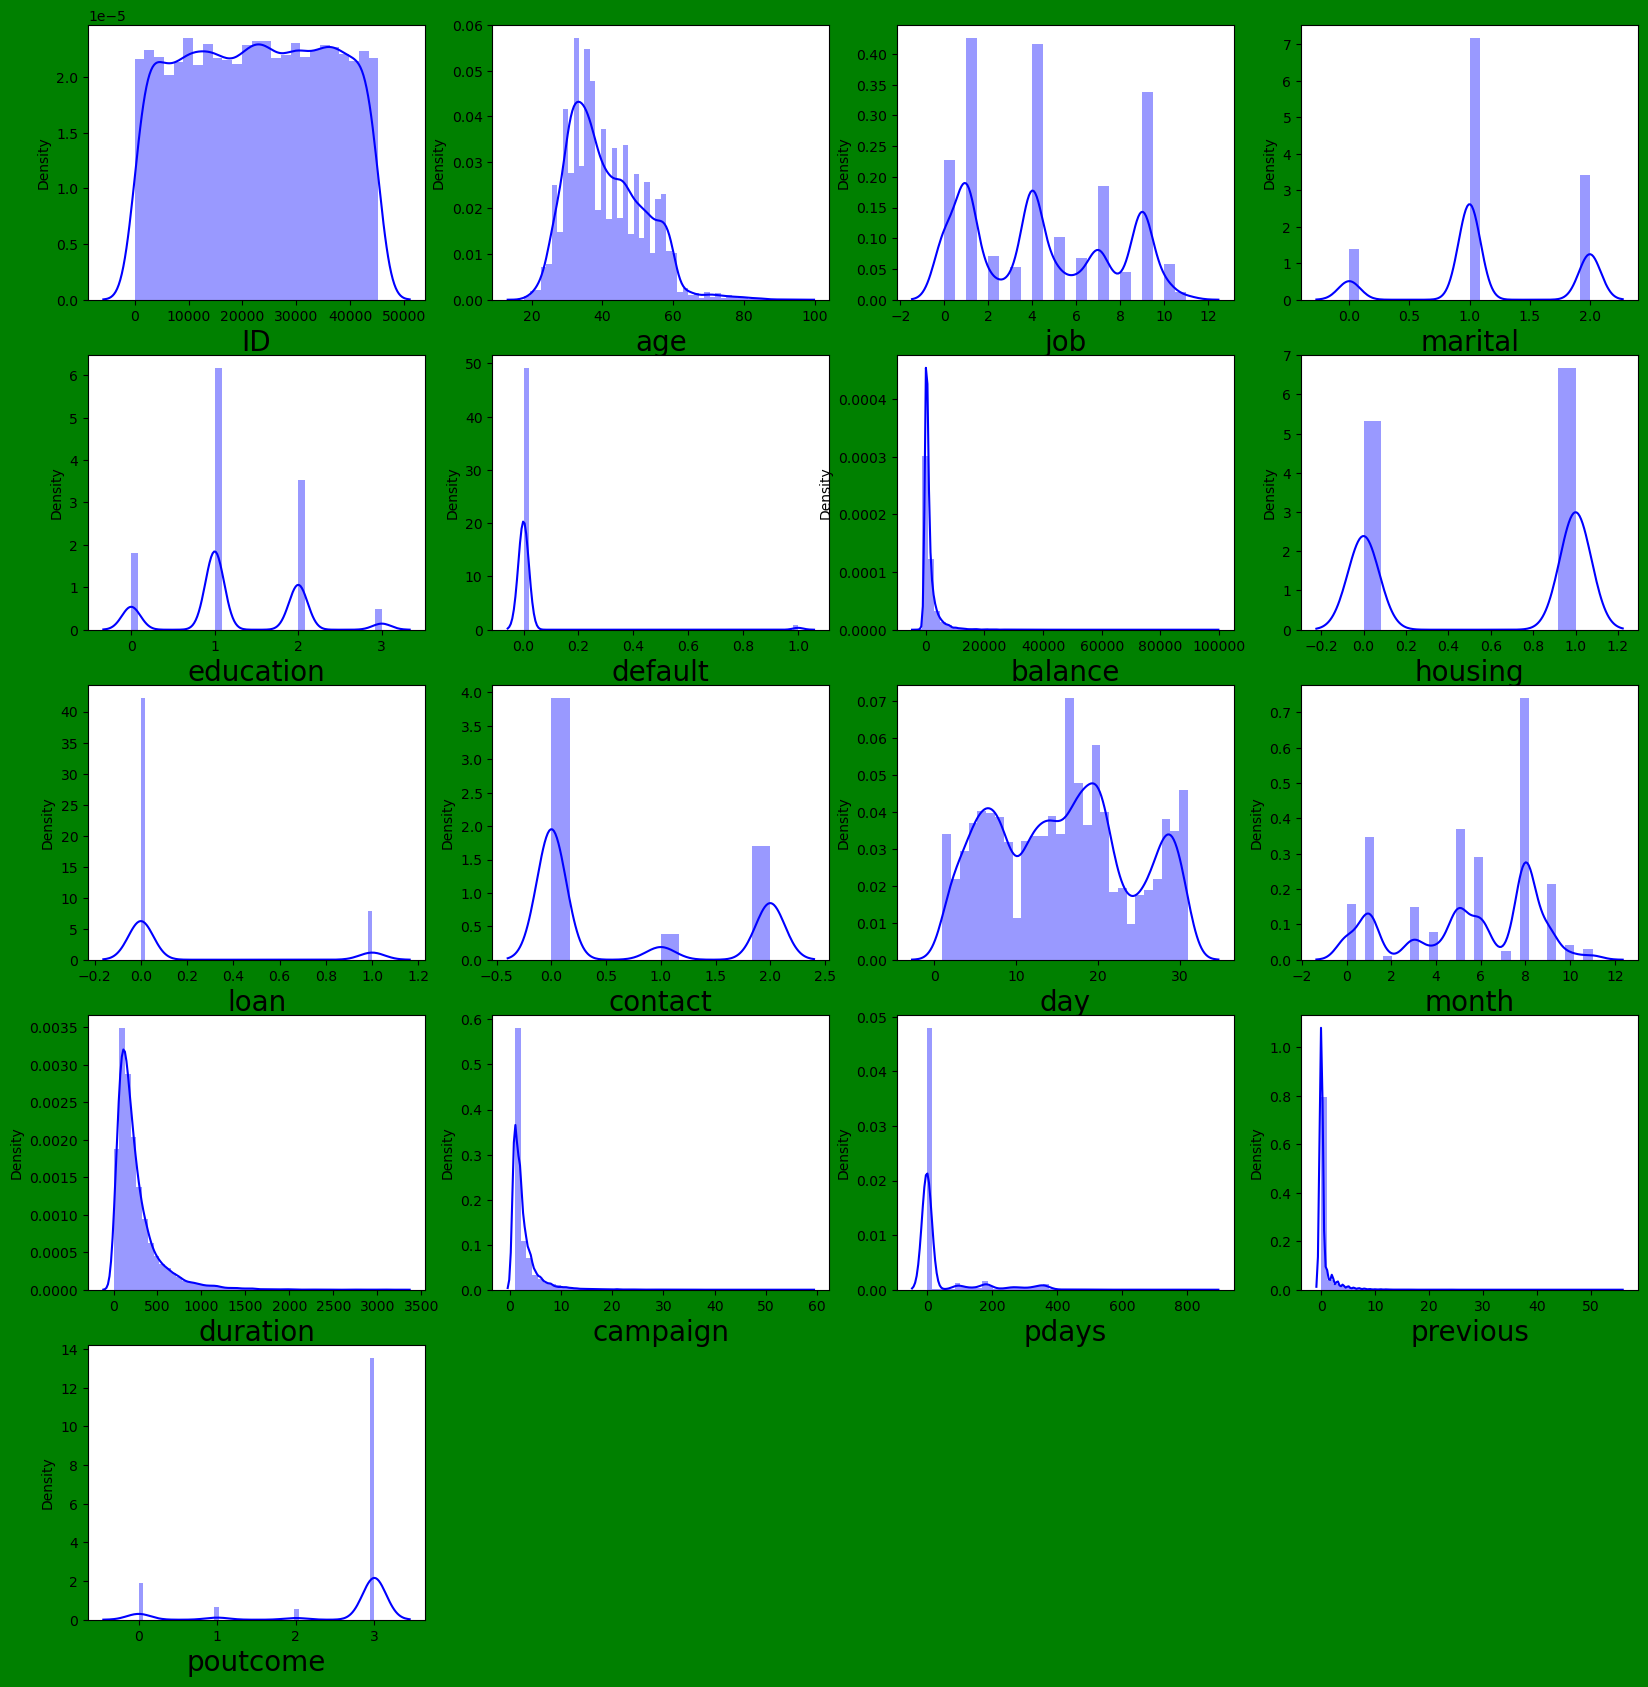

In [52]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column], color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()    

# Checking for skewness

In [66]:
df.skew()

ID          -0.013625
age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

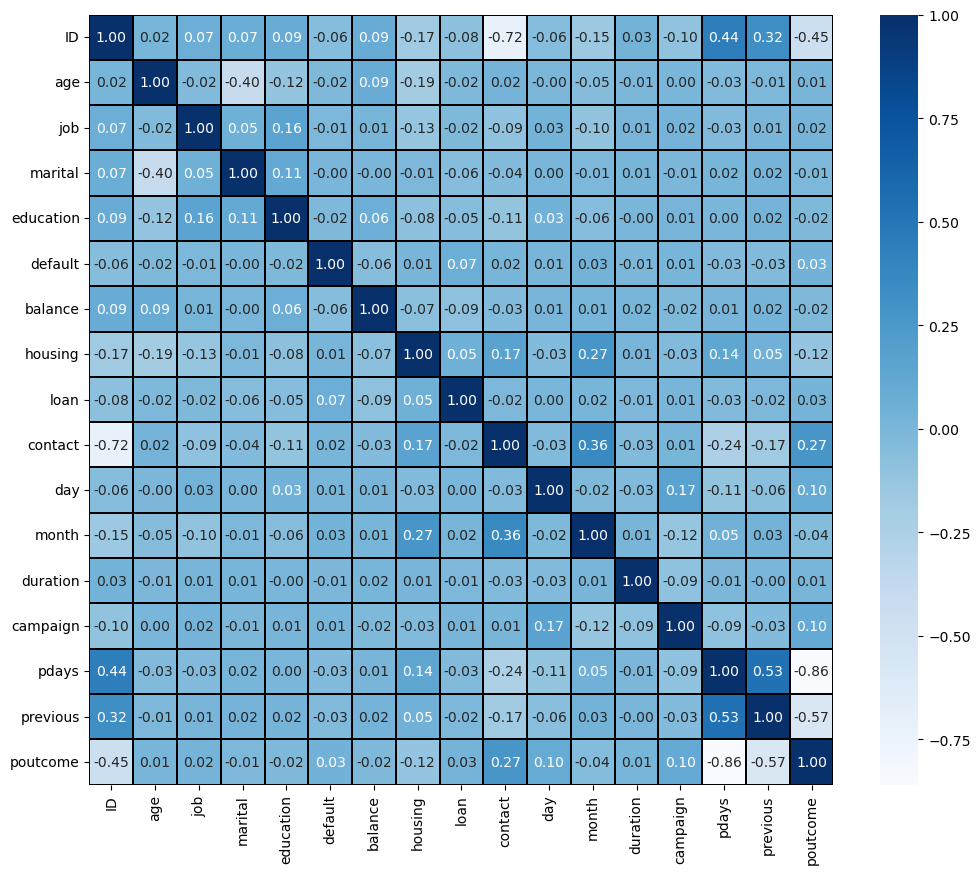

In [69]:
plt.figure(figsize=(12, 10))


sns.heatmap(df.corr(),
            annot= True,
            cmap= "Blues",
            linewidths= 0.1,
            linecolor= 'black',
            fmt= '.2f')

plt.yticks(rotation=0)

plt.show()

In [5]:
df['duration'] = np.cbrt(df['duration'])

In [6]:
df.drop("ID", axis=1, inplace=True)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,2.714418,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,7.191966,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,8.776383,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,4.020726,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,4.805896,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,5.289572,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,5.406120,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,5.142563,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,5.924992,2,91,3,success
